In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import plot

In [2]:
def plot_meta_loss(tests, ax):
    for test in tests:
        df = pd.read_csv(plot.get_test(test, data="summary"))
        ax.plot(df["meta_loss"], label=plot.get_name(test))
    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax.set_ylabel("Meta Loss")
    ax.legend()

def plot_training(test, ax):
    df = pd.read_csv(plot.get_test(test, data="summary"))
    
    ax.set_title(plot.get_name(test))
    ax.set_xlabel("Period (100 meta epochs; run 4x parallel)")
    ax2 = ax.twinx()

    a = ax.plot(df["meta_loss"], label="Meta Loss", color='C0')
    b = ax2.plot(df["imitation_loss"], label="Imitation Loss", color='C1')

    ax.set_ylabel("Meta Loss")
    ax2.set_ylabel("Imitation Loss")
    
    ax2.legend(a + b, [x.get_label() for x in a + b])


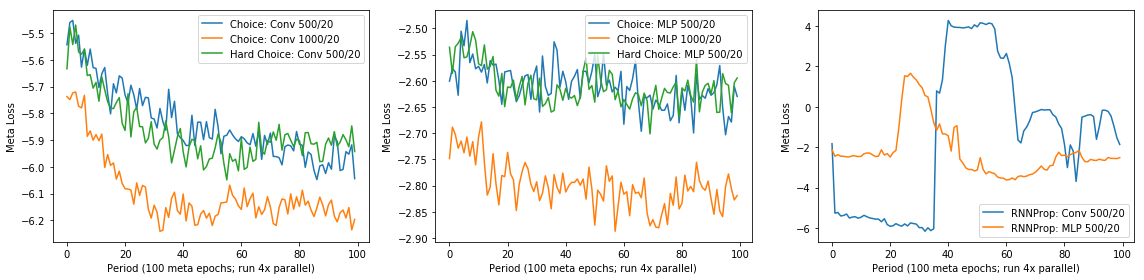

In [6]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plot_meta_loss(["choice-20x25C", "choice-20x50C", "choice-20x25C-hard"], axs[0])
plot_meta_loss(["choice-20x25M", "choice-20x50M", "choice-20x25M-hard"], axs[1])
plot_meta_loss(["rnnprop-20x25C", "rnnprop-20x25M"], axs[2])
fig.tight_layout()

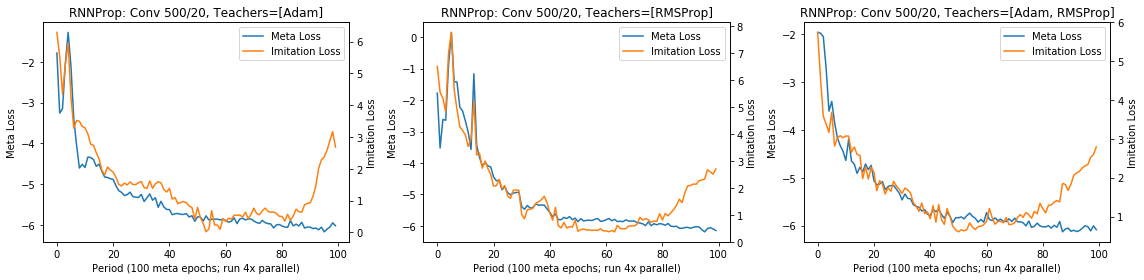

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plot_training("rnnprop-20x25CA", axs[0])
plot_training("rnnprop-20x25CR", axs[1])
plot_training("rnnprop-20x25CAR", axs[2])
fig.tight_layout()

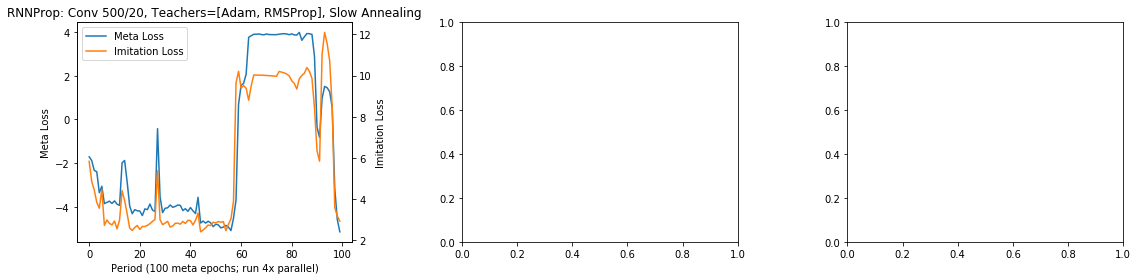

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
plot_training("rnnprop-20x25CAR-more", axs[0])
fig.tight_layout()